In [427]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [428]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [429]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Play_Tennis.csv')

In [430]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [431]:
print('The size of the dataset is ',len(df))

The size of the dataset is  14


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


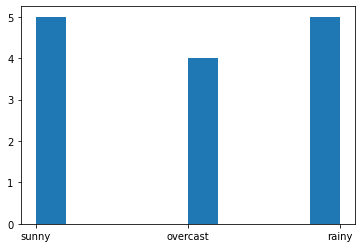

In [433]:
plt.hist(df['outlook'])
plt.show()

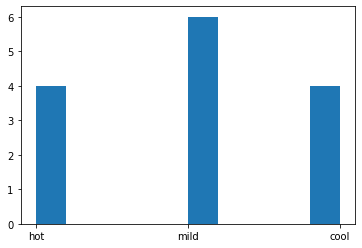

In [434]:
plt.hist(df['temp'])
plt.show()

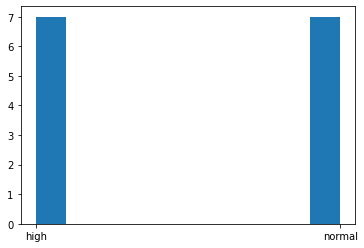

In [435]:
plt.hist(df['humidity'])
plt.show()

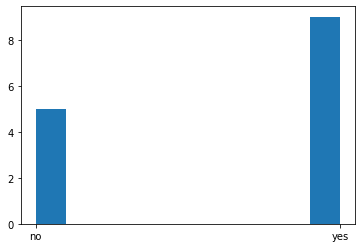

In [436]:
plt.hist(df['play'])
plt.show()

This dataset consists weather information. The motive is to predict whether depending on the weather ,is it possible to play tennis or not.
target class:Play

we need to preprocess the dataset to convert string and boolean to integer values.


In [437]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
df.iloc[:,0]=labelEncoder.fit_transform(df.iloc[:,0].values)
df.iloc[:,1]=labelEncoder.fit_transform(df.iloc[:,1].values)
df.iloc[:,2]=labelEncoder.fit_transform(df.iloc[:,2].values)
df.iloc[:,3]=labelEncoder.fit_transform(df.iloc[:,3].values)
df.iloc[:,4]=labelEncoder.fit_transform(df.iloc[:,4].values)

df.head()


,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [438]:
new_data=[['1','1','1','0']]

In [439]:
x=df[['outlook','temp','humidity','windy']]
y=df['play']

In [440]:
df['play'].value_counts()

1    9
0    5
Name: play, dtype: int64

the dataset is partly balanced

Split the dataset into train and test


In [441]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=1)

First we will see CART decision tree

In [442]:
model_cart = DecisionTreeClassifier(criterion = 'gini',max_depth = 4)#cart classifier
model_cart.fit(x_train,y_train)
pred_cart = model_cart.predict(x_test)
cm_cart=confusion_matrix(y_test,pred_cart)
print(cm_cart)


[[1 0]
 [2 3]]


In [443]:
tn1,fp1,fn1,tp1=cm_cart.ravel()
print('True Positive : ',tp1)
print('True Negative : ',tn1)
print('False Positive : ',fp1)
print('False Negative : ',fn1)

True Positive :  3
True Negative :  1
False Positive :  0
False Negative :  2


In [444]:
recall1=(tp1)/(tp1+fn1)
print("Recall: ",recall1)

specificity1=(tn1)/(fp1+tn1)
print("Specificity: ",specificity1)

precision1=(tp1)/(tp1+fp1)
print("Precision: ",precision1)

npv1=(tn1)/(fn1+tn1)
print("NPV: ",npv1)

f1_score1=(2*precision1*recall1)/(precision1+recall1)
print("F1Score: ",f1_score1)

mcc1=(tp1*tn1-fp1*fn1)/(np.sqrt((tp1+fp1)*(tp1+fn1)*(tn1+fp1)*(tn1+fn1)))
print("MCC: ",mcc1)

from sklearn.metrics import roc_auc_score
roc1=roc_auc_score(y_test,pred_cart)
print("ROC AUC Score: ",roc1)

Recall:  0.6
Specificity:  1.0
Precision:  1.0
NPV:  0.3333333333333333
F1Score:  0.7499999999999999
MCC:  0.4472135954999579
ROC AUC Score:  0.8


In [445]:
pred1=model_cart.predict(new_data)
print("predicted value is:",pred1)
if pred1 == 0:
    print("not playing")
else:
  print("playing")

predicted value is: [1]
playing


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


[Text(0.3333333333333333, 0.875, 'X[0] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.625, 'X[2] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.375, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

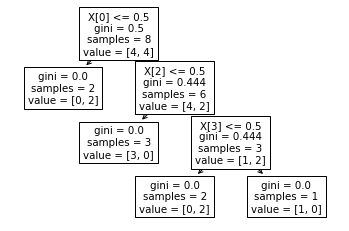

In [446]:
tree.plot_tree(model_cart)

The root node for cart decision tree is x[0] ,that is the outlook feature. the root node is selected on the basis of gini index  should lower from rootnode to leaf node.

Now, we will observe ID3 decision tree

In [447]:
model_id3 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4)#ID3 classifier
model_id3.fit(x_train,y_train)
pred_id3 = model_id3.predict(x_test)
cm_id3=confusion_matrix(y_test,pred_cart)
print(cm_id3)

[[1 0]
 [2 3]]


In [448]:
tn2,fp2,fn2,tp2=cm_id3.ravel()
print('True Positive : ',tp2)
print('True Negative : ',tn2)
print('False Positive : ',fp2)
print('False Negative : ',fn2)

True Positive :  3
True Negative :  1
False Positive :  0
False Negative :  2


In [449]:
recall2=(tp2)/(tp2+fn2)
print("Recall: ",recall2)

specificity2=(tn2)/(fp2+tn2)
print("Specificity: ",specificity2)

precision2=(tp2)/(tp2+fp2)
print("Precision: ",precision2)

npv2=(tn2)/(fn2+tn2)
print("NPV: ",npv2)

f1_score2=(2*precision2*recall2)/(precision2+recall2)
print("F1Score: ",f1_score2)

mcc2=(tp2*tn2-fp2*fn2)/(np.sqrt((tp2+fp2)*(tp2+fn2)*(tn2+fp2)*(tn2+fn2)))
print("MCC: ",mcc2)

from sklearn.metrics import roc_auc_score
roc2=roc_auc_score(y_test,pred_id3)
print("ROC AUC Score: ",roc2)

Recall:  0.6
Specificity:  1.0
Precision:  1.0
NPV:  0.3333333333333333
F1Score:  0.7499999999999999
MCC:  0.4472135954999579
ROC AUC Score:  0.8


In [450]:
pred1=model_id3.predict(new_data)
print("predicted value is:",pred1)
if pred1 == 0:
    print("not playing")
else:
  print("playing")

predicted value is: [1]
playing


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


[Text(0.4, 0.875, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.625, 'X[3] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.4, 0.375, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]')]

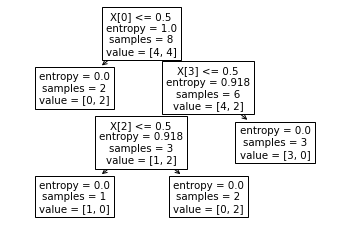

In [451]:
tree.plot_tree(model_id3)

The root node for id3 decision tree is x[0] ,that is the outlook feature. the root node is selected on the basis of entropy should lower from rootnode to leaf node.

Final Inference:

CART decision tree:
The measure of the degree of probability of a particular variable being wrongly classified when it is randomly chosen is called the Gini index or Gini impurity. The data is equally distributed based on the Gini index.

ID3 decision tree:
Entropy is the main concept of this algorithm, which helps determine a feature or attribute that gives maximum information about a class is called Information gain or ID3 algorithm. By using this method, we can reduce the level of entropy from the root node to the leaf node.